In [1]:
import datetime
import math
import os
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [2]:
def plot_measures(values,labels,titulo, x_rotation, fig_size=(8,8)):
        
    ind = np.arange(len(labels))  # the x locations for the groups
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots(figsize=fig_size)
    rects1 = ax.bar(ind, values, width,color='SkyBlue')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conteos')
    ax.set_title(titulo)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels,rotation = x_rotation)
    
    autolabel(rects1,ax, "center")
    plt.show()
    
def autolabel(rects, ax,xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                height, ha=ha[xpos], va='bottom')    

In [3]:
dataset_dir = os.path.join('..','..','dataset','Series','Caudal')

data_list = list()
for root, dirs, files in os.walk(dataset_dir, topdown=False):
    for file in files:
        f = pd.read_excel(os.path.join(root,file))
        data_list.append(f)
        print(os.path.join(root,file),f.shape)
            
dataset = pd.concat(data_list)

..\..\dataset\Series\Caudal\Aporte Rios_0.xlsx (192399, 6)


In [4]:
dataset.shape

(192399, 6)

In [5]:
dataset.columns

Index(['Fecha', 'Nombre Río', 'Region Hidrologica', 'Aportes Caudal m3/s',
       'Aportes Energía kWh', 'Aportes %'],
      dtype='object')

# NOMBRE RIO

In [6]:
rios_unicos = pd.unique(dataset['Nombre Río'])

In [8]:
'Cantidad de Ríos Unicos: {}'.format(len(rios_unicos))

'Cantidad de Ríos Unicos: 36'

In [10]:
rios_unicos_conteo = dataset.groupby('Nombre Río')['Fecha'].count()
rios_unicos_conteo = rios_unicos_conteo.sort_values(ascending=False)

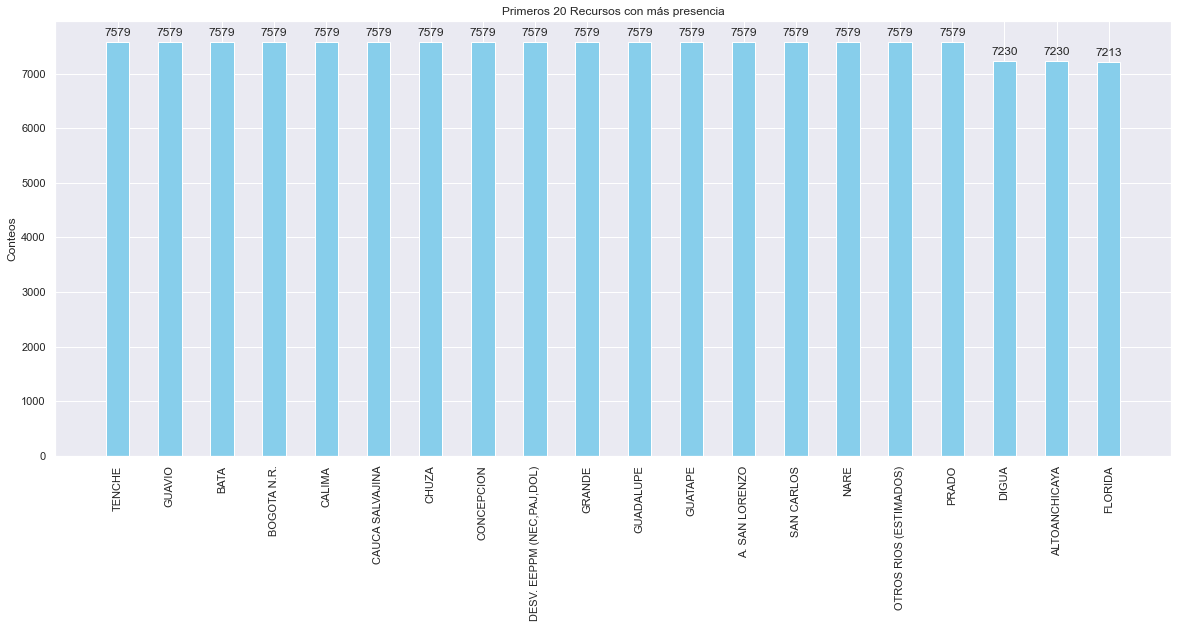

In [11]:
rios_unicos_primeros = rios_unicos_conteo[:20]
values = rios_unicos_primeros.values
labels = rios_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

# REGIÓN HIDROLOGICA

In [12]:
region_unicos = pd.unique(dataset['Region Hidrologica'])

In [14]:
'Cantidad de Regiones Unicos: {}'.format(len(region_unicos))

'Cantidad de Regiones Unicos: 6'

In [15]:
region_unicos_conteo = dataset.groupby('Region Hidrologica')['Fecha'].count()
region_unicos_conteo = region_unicos_conteo.sort_values(ascending=False)

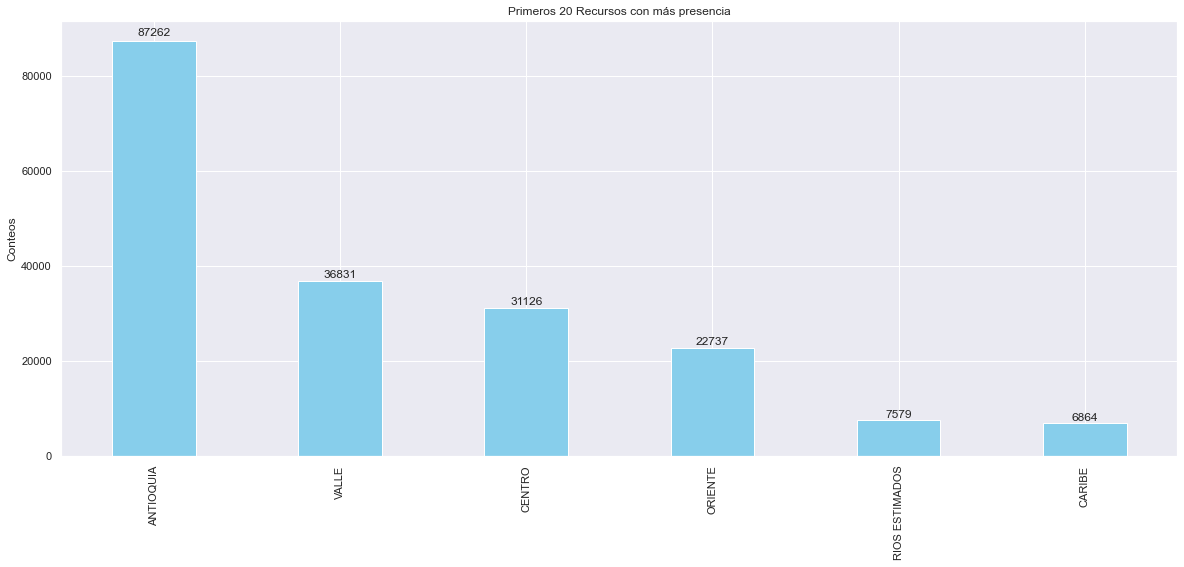

In [16]:
region_unicos_primeros = region_unicos_conteo[:20]
values = region_unicos_primeros.values
labels = region_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

# Visualización de los datos

In [17]:
def obtener_datos_por_rio(data,nombre_rio):
    
    data['Fecha'] =  pd.to_datetime(data['Fecha'], format='%Y-%m-%d')
    
    datos_filtrados = data[data['Nombre Río'] == nombre_rio]
    datos_filtrados = datos_filtrados.copy()

    datos_filtrados = datos_filtrados.set_index('Fecha')
    
    datos_filtrados['Año'] = datos_filtrados.index.year
    datos_filtrados['Mes'] = datos_filtrados.index.month
    datos_filtrados['Dia'] = datos_filtrados.index.day_name()
    
    return datos_filtrados

In [18]:
def grafico_comportamiento_variables(datos):
    cols_plot = ['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']
    nombre_graficas = ['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']
    axes = datos[cols_plot].plot(alpha=0.8, linestyle='-', figsize=(20, 9), subplots=True)
    for ax,name in zip(axes,nombre_graficas):
        ax.set_ylabel(name)

In [19]:
def grafico_comportamiento_variables_por_mes(datos):
    cols_plot = ['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']
    fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
    for name, ax in zip(cols_plot, axes):
        sns.boxplot(data=datos, x='Mes', y=name, ax=ax)
        ax.set_title(name)
        
        if ax != axes[-1]:
            ax.set_xlabel('')

In [20]:
def grafico_filtrado_fecha_variable(datos,fecha_min,fecha_max,variable):
    ax = datos.loc[fecha_min:fecha_max, variable].plot(marker='o',linestyle='-',figsize=(15, 9))
    ax.set_ylabel(variable);

In [21]:
def grafico_resampling_rolling_window(datos,fecha_min,fecha_max,variable):
    cols_plot = ['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']
    datos_7d = datos[cols_plot].rolling(7, center=True).mean()

    fig, ax = plt.subplots()

    ax.plot(datos.loc[fecha_min:fecha_max, variable],
    marker='.', linestyle='-', linewidth=0.5, label='Diaria')

    ax.plot(datos_7d.loc[fecha_min:fecha_max, variable],linestyle='-', label='Media Movil 7-Días')

    ax.set_ylabel(variable)
    ax.legend();

In [23]:
rio = obtener_datos_por_rio(dataset,nombre_rio='GUATAPE')

### Gráfico comportamiento variables

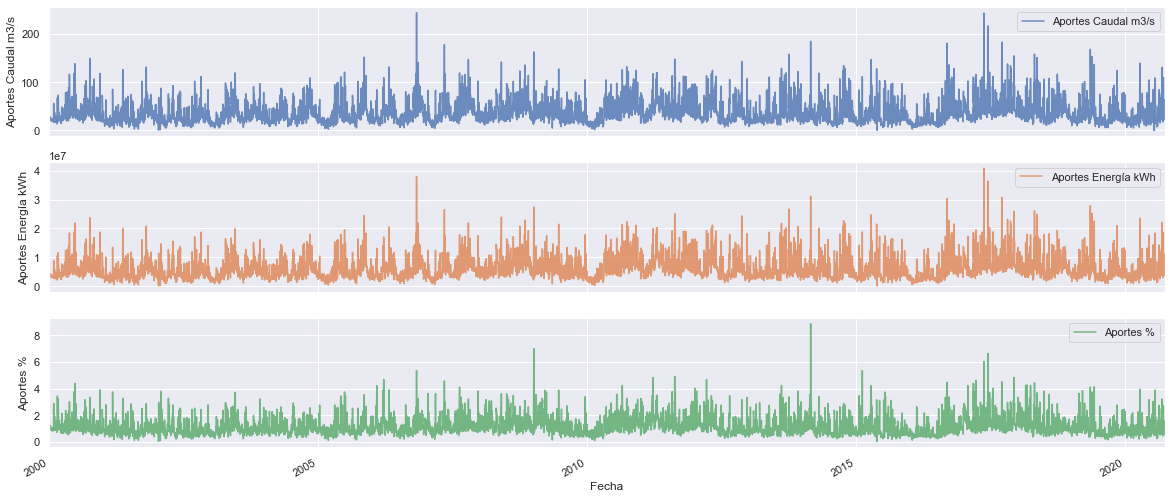

In [24]:
grafico_comportamiento_variables(rio)

### Comportamiento variables por mes

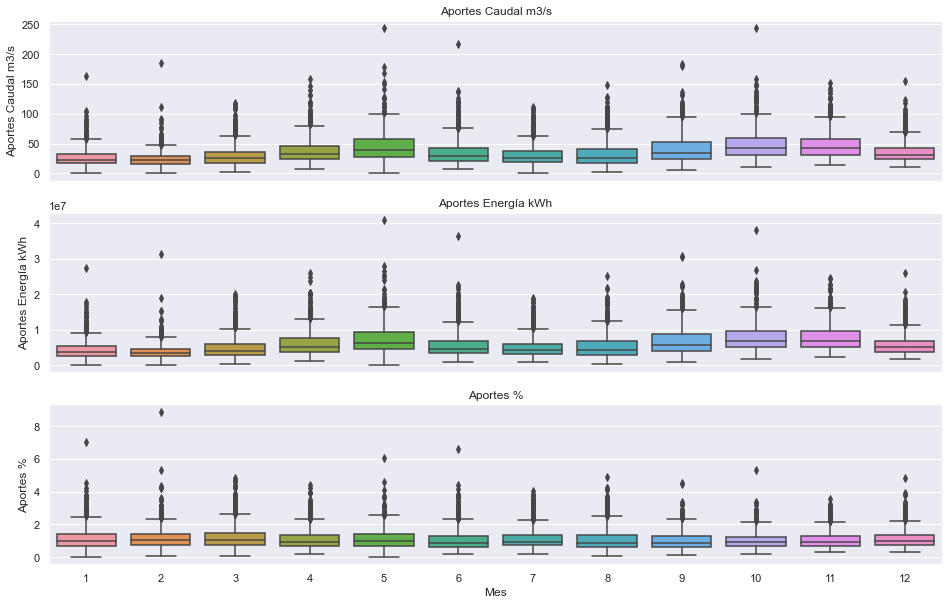

In [25]:
grafico_comportamiento_variables_por_mes(rio)

In [26]:
'Fecha Mínima {} - Fecha Máxima {}'.format(rio.index.min(),rio.index.max())

'Fecha Mínima 2000-01-01 00:00:00 - Fecha Máxima 2020-09-30 00:00:00'

### Datos estación filtrado por Variable y Fecha

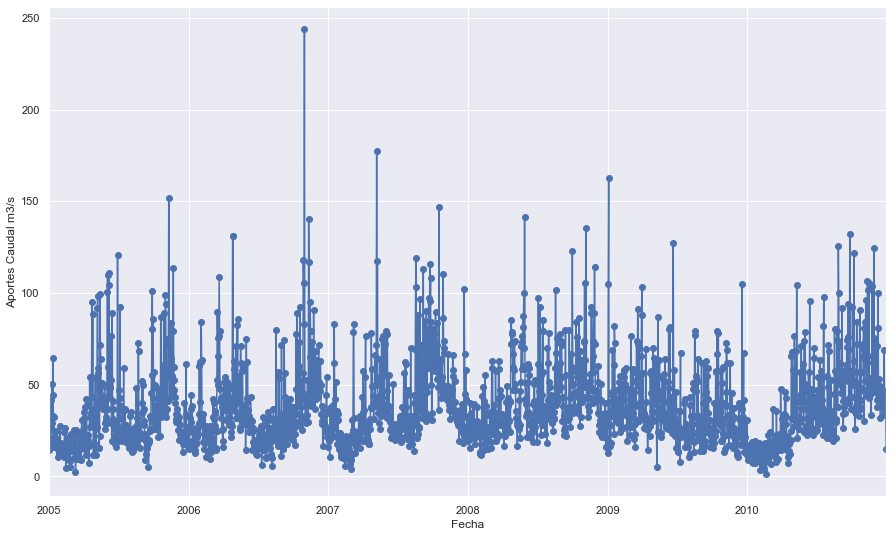

In [27]:
grafico_filtrado_fecha_variable(datos=rio,fecha_min='2005-01',fecha_max='2010-12',variable='Aportes Caudal m3/s')

### Remuestreo de los datos filtrado por Variable y Fecha

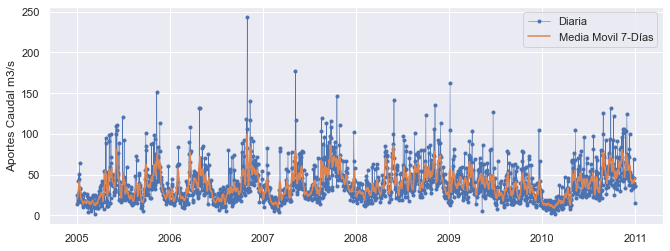

In [28]:
grafico_resampling_rolling_window(datos=rio,fecha_min='2005-01',fecha_max='2010-12',variable='Aportes Caudal m3/s')